# Signal Detection in M-PSK Modulation Under Channel’s Additive Noise and False Data Injection (Main File)

#### G08: Mina Faghih, Zahra Sadat Jamadi, Milad Heshmati and Mehran Attar

##### COMP 6321: Machine Learning Project Report

##### Concordia University

In [1]:
# import the required packages

from sklearn.ensemble import BaggingClassifier
from clf_modules import svm_clf
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_blobs
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from matplotlib import cycler
import pandas as pd
import warnings                   # for turning off the warnings during the training process 
import sklearn.exceptions
warnings.filterwarnings(action='ignore')
from sklearn.metrics import plot_confusion_matrix


colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Importing the Dataset
In this section, MPSK dataset is imported  

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

Structure of the dataset (as a data frame)

In [3]:
data = np.hstack((X, y.reshape(1000,1)))  #Forming dataset containing 8 features and labels
columns = ["Position: $I$", "position:$Re$",'Transmitter Phase: $T_{X}$','Receiver Phase: $R_{X}$ ',
           'Power: $P$','SNR $(dB)$','Deviation Magnitude','Deviation Angle','y']
df = pd.DataFrame(data=data, columns=columns)
df

,Position: $I$,position:$Re$,Transmitter Phase: $T_{X}$,Receiver Phase: $R_{X}$,Power: $P$,SNR $(dB)$,Deviation Magnitude,Deviation Angle,y
0,1.387713,11.342885,0.002913,0.003070,4.182083,9.221062,-0.310481,3.988408,2.0
1,-1.855179,9.086240,-0.013617,-0.001962,3.886631,8.978228,9.471410,10.592831,2.0
2,-8.512182,-8.498638,-0.014551,-0.009135,4.194901,9.533327,4.684150,5.332787,5.0
3,-8.708561,-2.599849,-0.031750,-0.005274,4.390711,9.366913,4.487302,-2.157129,4.0
4,-9.193569,7.210812,0.002093,-0.005225,4.591268,10.270233,0.822947,1.140662,3.0
5,12.369562,-0.492625,0.002421,0.003679,4.005027,9.131793,19.594497,13.314999,0.0
6,-7.175063,7.175439,0.010752,0.003397,4.539450,10.362155,-31.132934,-32.094865,3.0
7,-11.569987,1.297120,0.019742,0.009159,3.992220,9.132912,9.893443,7.133855,4.0
8,-1.455792,9.550525,0.021529,0.003921,3.958419,9.136673,15.405959,20.295632,2.0
9,-10.988708,0.768258,-0.036655,-0.008178,3.616875,8.450927,12.525838,13.628568,4.0


### Plotting the Final Dataset
In this section, MPSK samples are plotted for different features.

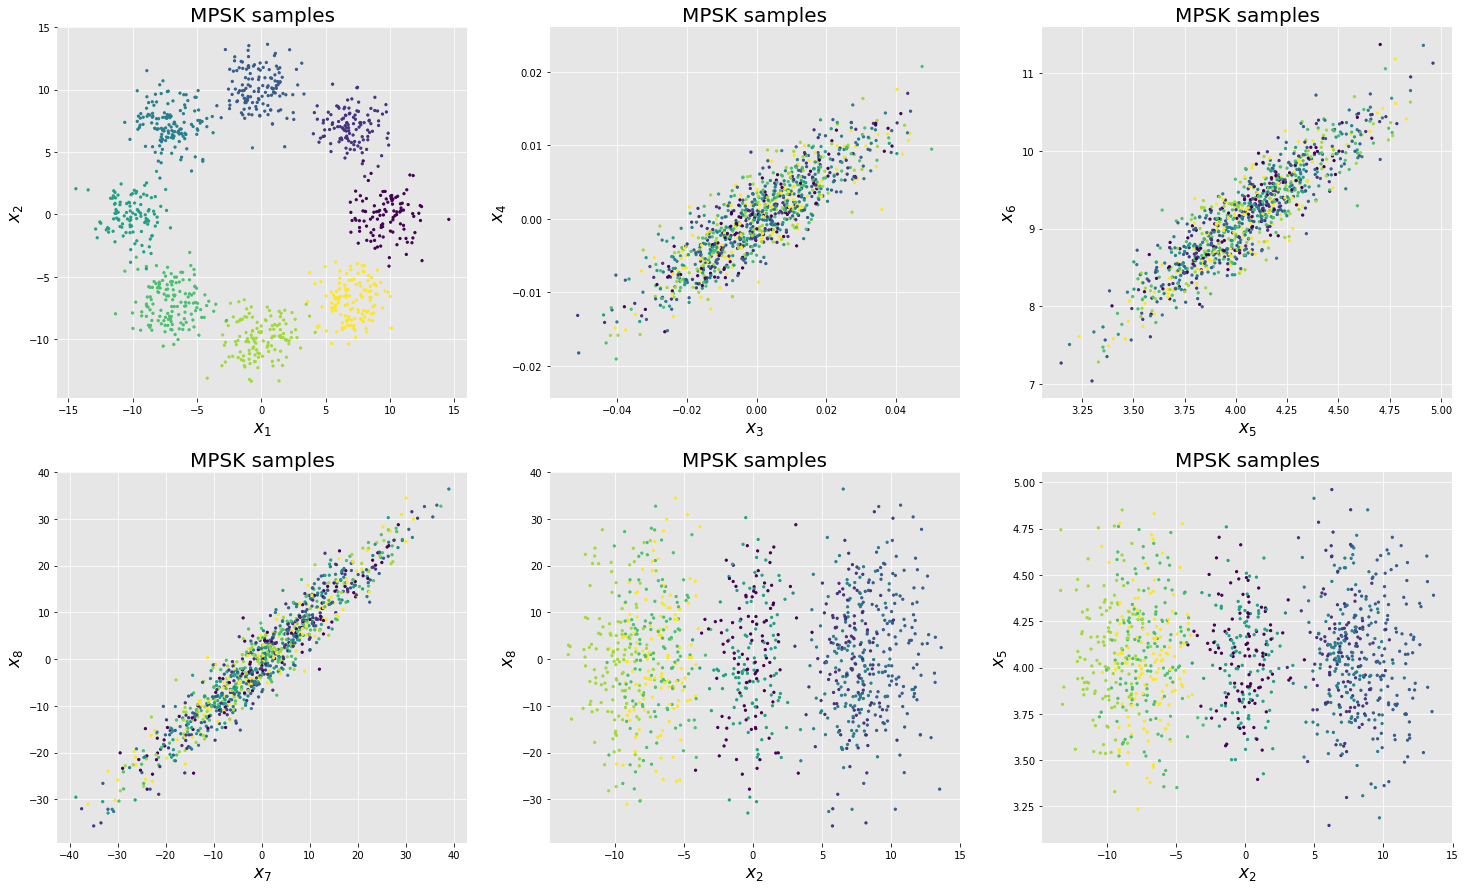

In [4]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.scatter(X[:,0],X[:,1],c=y,s=5) #First and Second feature
plt.xlabel('$x_1$', fontsize=17)
plt.ylabel('$x_2$', fontsize=17)
plt.title('MPSK samples', fontsize=20)

plt.subplot(2,3,2)
plt.scatter(X[:,2],X[:,3],c=y,s=5) #Third and fourth feature
plt.xlabel('$x_3$', fontsize=17)
plt.ylabel('$x_4$', fontsize=17)
plt.title('MPSK samples', fontsize=20)

plt.subplot(2,3,3)
plt.scatter(X[:,4],X[:,5],c=y,s=5) #Fifth and sixth feature
plt.xlabel('$x_5$', fontsize=17)
plt.ylabel('$x_6$', fontsize=17)
plt.title('MPSK samples', fontsize=20)

plt.subplot(2,3,4)
plt.scatter(X[:,6],X[:,7],c=y,s=5) #Seventh and eigth feature
plt.xlabel('$x_7$', fontsize=17)
plt.ylabel('$x_8$', fontsize=17)
plt.title('MPSK samples', fontsize=20)

plt.subplot(2,3,5)
plt.scatter(X[:,1],X[:,7],c=y,s=5) #Second and eighth feature
plt.xlabel('$x_2$', fontsize=17)
plt.ylabel('$x_8$', fontsize=17)
plt.title('MPSK samples', fontsize=20)

plt.subplot(2,3,6)
plt.scatter(X[:,1],X[:,4],c=y,s=5) #Second and fifth feature
plt.xlabel('$x_2$', fontsize=17)
plt.ylabel('$x_5$', fontsize=17)
plt.title('MPSK samples', fontsize=20)
plt.show()

### Train Test Split
For training our classifiers, we split our dataset to a tarining and a test. 60 percent of data is used for tarining and 40 percent of data is considered for testing the classifiers.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,shuffle=True)

## Train SVM Without PCA 
In this section, we use hyperparameter search to obtain the optimal classifier. 5-fold cross validation and grid search is used to find the best values for *'gamma'* and regularization paramter or *'C'*.

In [6]:
# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

# 3: create classifier
grid_svm = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid_svm.fit(X_train, y_train);

After obtaining the optimal classifier, the accuarcy on training and test set is computed in this part.

In [7]:
print(grid_svm.best_estimator_.__class__.__name__ + ' results:')
print("The best parameters are %s with a score of %0.2f" % (grid_svm.best_params_, grid_svm.best_score_*100)+'%')
print("Score on test data is ", '%0.2f' % (grid_svm.best_estimator_.score(X_test ,y_test)*100)+'%')
y_pred = grid_svm.best_estimator_.predict(X_test)

SVC results:
The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 97.33%
Score on test data is  96.75%


#### Plotting the confusion matrix for SVM classifier

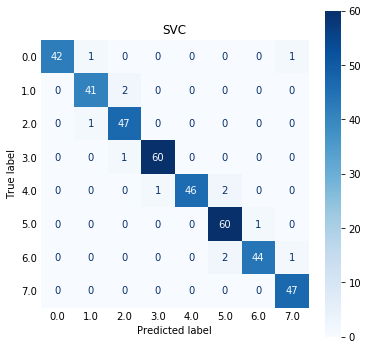

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(grid_svm, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(grid_svm.best_estimator_.__class__.__name__);

## Train MLP Classifier Without PCA
In this section, an optimal MLP classifier for the given ranged of hyperparameters is obtained using 5-fold cross validation and grid search. Classifiers are trained for different values of *'alpha'* and *'hidden_layer_sizes'*.

In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
alpha_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
units_range = [(20,15,10), (20,15,5), (20,10,5)]
param_grid = dict(alpha=alpha_range,hidden_layer_sizes=units_range)

# 3: create classifier
grid_mlp = GridSearchCV(MLPClassifier(learning_rate='adaptive',max_iter=150, verbose=0)
                    , param_grid=param_grid, cv=cv);

# 4: Train
grid_mlp.fit(X_train, y_train);

Again, after finding the optimal MLP classifier, its accuarcy on test data set is computed.

In [10]:
print(grid_mlp.best_estimator_.__class__.__name__ + ' results:')
print("best parameters are %s with a score of %0.2f" % (grid_mlp.best_params_, grid_mlp.best_score_*100)+'%')
print("Score on test data is ", '%0.2f' % (grid_mlp.best_estimator_.score(X_test ,y_test)*100)+'%')
y_pred = grid_mlp.best_estimator_.predict(X_test)

MLPClassifier results:
best parameters are {'alpha': 10.0, 'hidden_layer_sizes': (20, 15, 10)} with a score of 98.33%
Score on test data is  98.50%


#### Confusion matrix for MLPClassifier

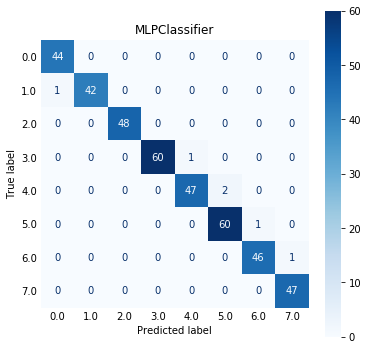

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(grid_mlp, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(grid_mlp.best_estimator_.__class__.__name__);

### Training logistic regression classifier
In this section, logistic regression classifer is trained using hyperparamter search. Differnet values of *'C'* are considered for for finding the best logistic regression classifier.

In [12]:
from sklearn.linear_model import LogisticRegression
# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = [1, 2, 5, 10]        
param_grid = dict(C = C_range)

# 3: create classifier
grid_lrc = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_grid, cv=cv)

# 4: Train
grid_lrc.fit(X_train, y_train);

Accuracy of the best estimator (LogisticRegression) on training and test sets is computed in this section.

In [13]:
print(grid_lrc.best_estimator_.__class__.__name__ + ' results:')
print("The best parameters are %s with a score of %0.2f" % (grid_lrc.best_params_, grid_lrc.best_score_*100)+'%')
print("score on test data is ", '%0.2f' % (grid_lrc.best_estimator_.score(X_test ,y_test)*100)+'%')

LogisticRegression results:
The best parameters are {'C': 1} with a score of 98.00%
score on test data is  98.25%


#### plotting confusion matrix for LogisticRegression

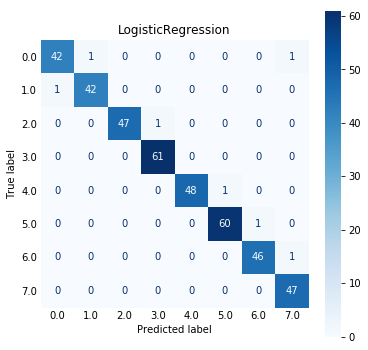

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(grid_lrc, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(grid_lrc.best_estimator_.__class__.__name__);

#### Define PCA Encoding Scheme

In this part, the encoding scheme using PCA is defined. Encoder preserves *alpha* percent of the information. The block diagram of the system using the encoding scheme is as follows: 

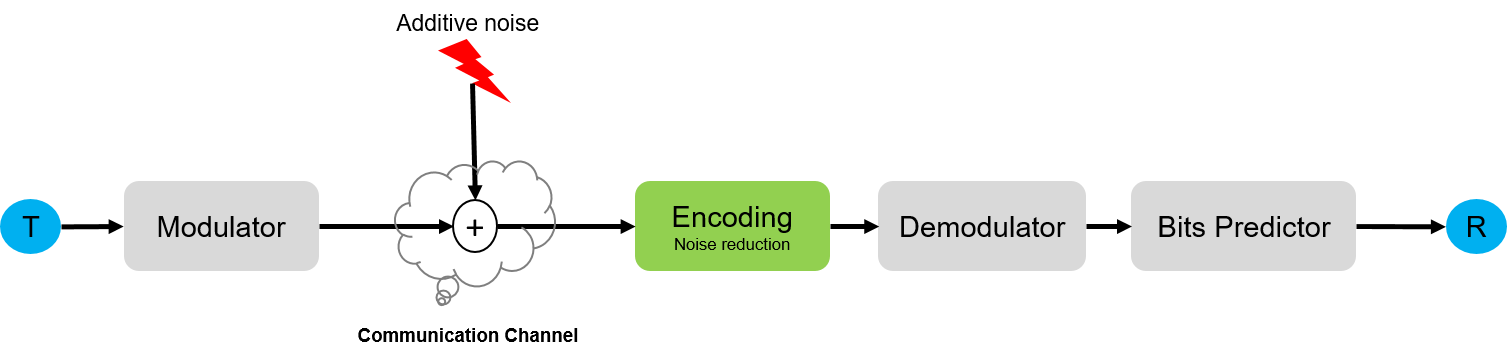

In [15]:
def encoder(X, alpha):
    from sklearn.decomposition import PCA

    pca = PCA(alpha)                                         # Keep alpha% of variance
    X_proj = pca.fit_transform(X)                            # Projection of the data in the lower dimensional space
    components = pca.components_                             # Principal Components (directions)
    components_info = pca.explained_variance_                # Importance of ecah direction (variances)
    n_components = components.shape[0]                       # Number of principle components
    X_approx = pca.inverse_transform(X_proj)                 # Reconstructed data after applying PCA
    
    # report
    
    print('total number of components:',X.shape[1])
    print()
    for i in range(n_components):
        print(i+1, 'st Principal Component:', '{:.2f}'.format(components_info[i]))
    print()
    print(components_info.shape[0], ' components choosed among ', X.shape[1])
    return X_proj, components,components_info, X_approx

Before applying the PCA on the dataset, we need to normalize the dataset and then PCA is applied. By seting *alpha = 0.95* (i.e., preserving 95% of the information) we have:  

In [16]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_proj, components, components_info, X_approx = encoder(X_scale, 0.95)
X_train, X_test, y_train, y_test = train_test_split(X_approx, y, test_size=0.4, random_state=42,shuffle=True)
X_back = scaler.inverse_transform(X_approx)

total number of components: 8

1 st Principal Component: 1.97
2 st Principal Component: 1.91
3 st Principal Component: 1.87
4 st Principal Component: 1.02
5 st Principal Component: 0.98

5  components choosed among  8


The above result shows that 95% of the information is in the first 5 principal components. 

#### Explained variance ratio
In this part we analyzed the useful information and noise accroding to the number of principle components. By the following plot we can visulaize the fuctionality of PCA using explained variance ratio.


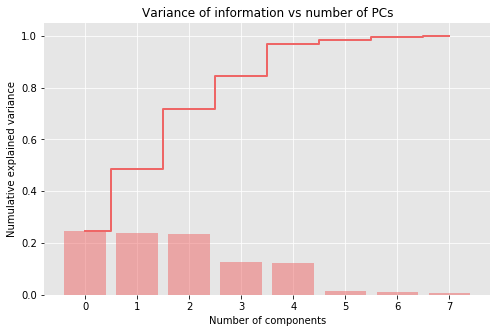

In [17]:
from sklearn.decomposition import PCA
plt.figure(figsize=(8, 5))

pca = PCA().fit(X_scale)  # Notice

plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('Number of components')
plt.ylabel('Numulative explained variance');
plt.title('Variance of information vs number of PCs')
plt.show()

### Visualization of the dataset before and after applying PCA
In this section, we visualize various dataset features before and after applying PCA. 

We choose the first five principal components of the dataset and reconstruct the dataset based on these features. The bold samples show the dataset after PCA, and pale color samples are the same samples before applying PCA.

total number of components: 8

1 st Principal Component: 1.97
2 st Principal Component: 1.91
3 st Principal Component: 1.87
4 st Principal Component: 1.02
5 st Principal Component: 0.98

5  components choosed among  8


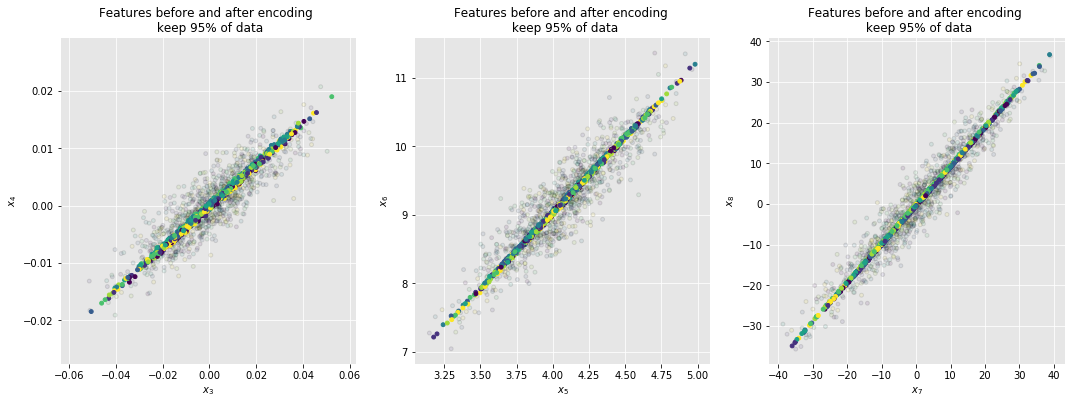

In [18]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_proj, components, components_info, X_approx = encoder(X_scale, 0.95)
X_train, X_test, y_train, y_test = train_test_split(X_approx, y, test_size=0.4, random_state=42,shuffle=True)
X_back = scaler.inverse_transform(X_approx)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(X[:,2],X[:,3],s=15,c=y, alpha=0.1,edgecolors='k')
plt.scatter(X_back[:,2],X_back[:,3],c=y,s=15, alpha=1)
plt.xlabel('$x_3$')
plt.ylabel('$x_4$')
plt.title('Features before and after encoding \n keep 95% of data')

plt.subplot(1,3,2)
plt.scatter(X[:,4],X[:,5],s=15,c=y, alpha=0.1,edgecolors='k')
plt.scatter(X_back[:,4],X_back[:,5],c=y,s=15, alpha=1)
plt.xlabel('$x_5$')
plt.ylabel('$x_6$')
plt.title('Features before and after encoding \n keep 95% of data')


plt.subplot(1,3,3)
plt.scatter(X[:,6],X[:,7],s=15,c=y, alpha=0.1,edgecolors='k')
plt.scatter(X_back[:,6],X_back[:,7],c=y,s=15, alpha=1)
plt.title('Features before and after encoding \n keep 95% of data')
plt.xlabel('$x_7$')
plt.ylabel('$x_8$')

plt.show()

In this part, we create our new training and test set by applying PCA based on the number of components

In [19]:
def pca_data_creator(X, n_components):
    for n_components in n_components:
        pca = PCA(n_components=n_components).fit(X)
        X_proj = pca.transform(X)
        X_approx = pca.inverse_transform(X_proj)
        X_train, X_test, y_train, y_test = train_test_split(X_approx, y, test_size=0.4, random_state=42,shuffle=True)
    
    return X_train, X_test, y_train, y_test

### LogisticRegression with PCA
In this part, we train logistic regression classifiers using PCA for different numbers of the components. 

Moreover, we use 5-fold cross validation and grid search to get the best classifier.  

In [20]:
score_lr = []
lr_estimators = []
for n_components in [1, 2, 3, 4, 5, 6, 7, 8]:                                      # Number of features
    X_train, X_test, y_train, y_test = pca_data_creator(X_scale, [n_components])   # Applying PCA on scaled training-set
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)                # Using 5-fold cross validation to be used in GridSearch
    C_range = [1, 2, 5, 10]                                                        # Range of values for C 
    param_grid = dict(C = C_range)                                                 # C parameter considered as the hyperparameter
    grid_lrc_pca = GridSearchCV(LogisticRegression(random_state=0), param_grid=param_grid, cv=cv)
    grid_lrc_pca.fit(X_train, y_train);
    print(grid_lrc_pca.best_estimator_.__class__.__name__ + ' results with n_components:',n_components)
    print("The best parameters are %s with a score of %0.2f" % (grid_lrc_pca.best_params_, grid_lrc_pca.best_score_*100)+'%')
    score_lr.append(grid_lrc_pca.best_estimator_.score(X_test ,y_test)*100)        # Appending best scores to a list
    lr_estimators.append(grid_lrc_pca.best_estimator_)                             # Appending best estimators to a list
    print("Score on test data is ", '%0.2f' % (grid_lrc_pca.best_estimator_.score(X_test ,y_test)*100)+'%')
    print('========================================================')

LogisticRegression results with n_components: 1
The best parameters are {'C': 1} with a score of 13.83%
Score on test data is  11.50%
LogisticRegression results with n_components: 2
The best parameters are {'C': 1} with a score of 13.17%
Score on test data is  10.50%
LogisticRegression results with n_components: 3
The best parameters are {'C': 1} with a score of 12.17%
Score on test data is  10.25%
LogisticRegression results with n_components: 4
The best parameters are {'C': 10} with a score of 56.33%
Score on test data is  57.00%
LogisticRegression results with n_components: 5
The best parameters are {'C': 10} with a score of 98.50%
Score on test data is  98.75%
LogisticRegression results with n_components: 6
The best parameters are {'C': 10} with a score of 98.33%
Score on test data is  98.50%
LogisticRegression results with n_components: 7
The best parameters are {'C': 5} with a score of 98.33%
Score on test data is  98.50%
LogisticRegression results with n_components: 8
The best pa

In [21]:
def plot_accuracy(clf, score):
    """
    This function is defined for plotting the test-set score for a classifier with respect to the number of components
    chosen by PCA.
    """
    n_components = [1, 2, 3, 4, 5, 6, 7, 8]
    plt.figure(figsize=(8,5))
    plt.plot(n_components,score,'bo-',markersize=7)

    # zip joins x and y coordinates in pairs
    for x,y in zip(n_components, score):

        label = "{:.2f}".format(y)
        plt.xlabel('number of components')
        plt.ylabel('score')
        plt.suptitle('score on test data- ' +clf.__class__.__name__ ,size=12)
        plt.annotate(label, # This is the text
                     (x, y), # These are the coordinates to position the label
                     textcoords="offset points", # How to position the text
                     xytext=(0, 8), # Distance from text to points (x,y)
                     ha='right') # Horizontal alignment can be left, right or center

    plt.show()

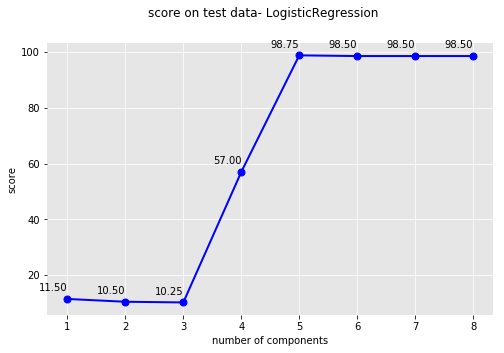

In [22]:
best_lr_est = lr_estimators[np.argmax(score_lr)]
plot_accuracy(best_lr_est, score_lr)

#### Confusion matrix for LogisticRegression classifier with PCA
To get a better idea of how logistic regression classifier works on the preprocessed dataset by PCA, confusion matrix is plotted.

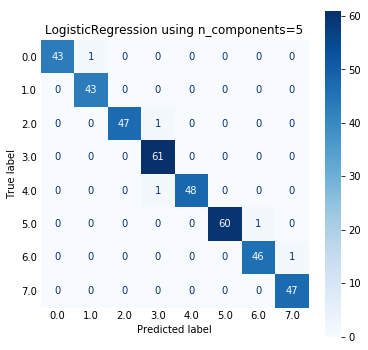

In [23]:
n_components = [1, 2, 3, 4, 5, 6, 7, 8]
choosed_n_components = n_components[np.argmax(score_lr)]   # Finds the number of components corresponding to the best score
best_lr_est = lr_estimators[np.argmax(score_lr)]           # Finds the estimator corresponding to the best score

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(best_lr_est, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(best_lr_est.__class__.__name__+ ' using n_components='+str(choosed_n_components));

## Training SVM Using PCA 
In this part, we train SVM classifiers using PCA for different numbers of the components.

Moreover, we use 5-fold cross validation and grid search to get the best classifier.  

In [24]:
svm_score = []
svm_estimators = []
for n_components in [1, 2, 3, 4, 5, 6, 7, 8]:
    X_train, X_test, y_train, y_test = pca_data_creator(X_scale, [n_components])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
    gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    # 3: create classifier
    grid_svm_pca = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

    # 4: Train
    grid_svm_pca.fit(X_train, y_train)
    
    print(grid_svm_pca.best_estimator_.__class__.__name__ + ' results with n_components:',n_components)
    print("The best parameters are %s with a score of %0.2f" % (grid_svm_pca.best_params_, grid_svm_pca.best_score_*100)+'%')
    svm_score.append(grid_lrc_pca.best_estimator_.score(X_test ,y_test)*100)
    svm_estimators.append(grid_svm_pca.best_estimator_)
    print("Score on test data is ", '%0.2f' % (grid_svm_pca.best_estimator_.score(X_test ,y_test)*100)+'%')
    print('========================================================')

SVC results with n_components: 1
The best parameters are {'C': 1.0, 'gamma': 1000.0} with a score of 17.33%
Score on test data is  12.25%
SVC results with n_components: 2
The best parameters are {'C': 100.0, 'gamma': 0.1} with a score of 16.50%
Score on test data is  11.50%
SVC results with n_components: 3
The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 14.83%
Score on test data is  10.00%
SVC results with n_components: 4
The best parameters are {'C': 1000.0, 'gamma': 0.001} with a score of 57.33%
Score on test data is  57.00%
SVC results with n_components: 5
The best parameters are {'C': 100.0, 'gamma': 0.001} with a score of 98.00%
Score on test data is  98.75%
SVC results with n_components: 6
The best parameters are {'C': 100.0, 'gamma': 0.001} with a score of 97.83%
Score on test data is  98.75%
SVC results with n_components: 7
The best parameters are {'C': 100.0, 'gamma': 0.001} with a score of 98.00%
Score on test data is  98.50%
SVC results with n_components: 8

#### Confusion matrix for SVM classifier with PCA
To get a better idea of how SVM classifier works on the preprocessed dataset by PCA, confusion matrix is plotted.

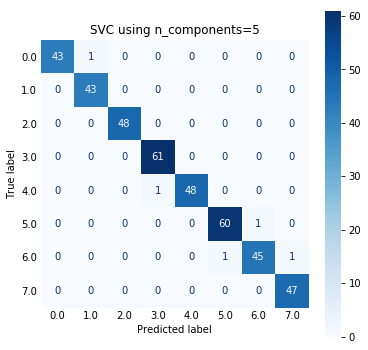

In [25]:
n_components = [1, 2, 3, 4, 5, 6, 7, 8]                    # Finds the number of components corresponding to the best score
choosed_n_components = n_components[np.argmax(svm_score)]  # Finds the estimator corresponding to the best score
best_svm_est = svm_estimators[np.argmax(svm_score)]

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(best_svm_est, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(best_svm_est.__class__.__name__+ ' using n_components='+str(choosed_n_components));

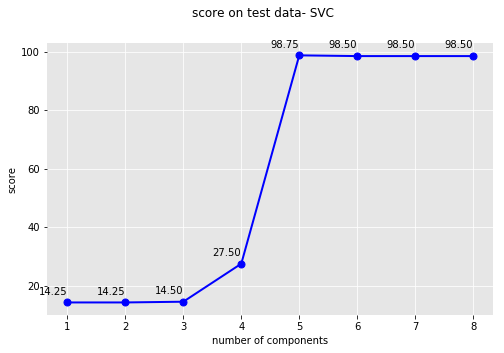

In [26]:
plot_accuracy(best_svm_est, svm_score)

### MLPClassifier with PCA
In this part, we train MLP classifiers using PCA for different numbers of the components.

Moreover, we use 5-fold cross validation and grid search to get the best classifier.  

In [27]:
mlp_score = []
mlp_estimators = []
for n_components in [1, 2, 3, 4, 5, 6, 7, 8]:
    X_train, X_test, y_train, y_test = pca_data_creator(X_scale, [n_components])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # 2: specify range of hyper-parameters
    alpha_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
    units_range = [(20,15,10), (20,15,5), (20,10,5)]
    param_grid = dict(alpha=alpha_range,hidden_layer_sizes=units_range)
    
    # 3: create classifier
    grid_mlp_pca = GridSearchCV(MLPClassifier(learning_rate='adaptive',max_iter=150, verbose=0)
                        , param_grid=param_grid, cv=cv);

    # 4: Train
    grid_mlp_pca.fit(X_train, y_train);
    
    print(grid_mlp_pca.best_estimator_.__class__.__name__ + ' results with n_components:',n_components)
    print("The best parameters are %s with a score of %0.2f" % (grid_mlp_pca.best_params_, grid_mlp_pca.best_score_*100)+'%')
    mlp_score.append(grid_mlp_pca.best_estimator_.score(X_test ,y_test)*100)
    mlp_estimators.append(grid_mlp_pca.best_estimator_)
    print("Score on test data is ", '%0.2f' % (grid_mlp_pca.best_estimator_.score(X_test ,y_test)*100)+'%')
    print('========================================================')

MLPClassifier results with n_components: 1
The best parameters are {'alpha': 0.001, 'hidden_layer_sizes': (20, 15, 5)} with a score of 16.83%
Score on test data is  12.75%
MLPClassifier results with n_components: 2
The best parameters are {'alpha': 0.001, 'hidden_layer_sizes': (20, 15, 5)} with a score of 15.50%
Score on test data is  10.75%
MLPClassifier results with n_components: 3
The best parameters are {'alpha': 10.0, 'hidden_layer_sizes': (20, 10, 5)} with a score of 14.17%
Score on test data is  11.75%
MLPClassifier results with n_components: 4
The best parameters are {'alpha': 1.0, 'hidden_layer_sizes': (20, 15, 10)} with a score of 55.17%
Score on test data is  55.50%
MLPClassifier results with n_components: 5
The best parameters are {'alpha': 0.01, 'hidden_layer_sizes': (20, 15, 10)} with a score of 98.50%
Score on test data is  98.00%
MLPClassifier results with n_components: 6
The best parameters are {'alpha': 0.001, 'hidden_layer_sizes': (20, 15, 10)} with a score of 98.17%

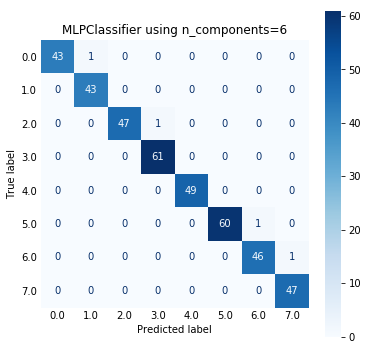

In [28]:
n_components = [1, 2, 3, 4, 5, 6, 7, 8]                     # Finds the number of components corresponding to the best score
choosed_n_components = n_components[np.argmax(mlp_score)]   # Finds the estimator corresponding to the best score
best_mlp_est = mlp_estimators[np.argmax(mlp_score)]

fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(best_mlp_est, X_test, y_test, ax=ax,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title(best_mlp_est.__class__.__name__+ ' using n_components='+str(choosed_n_components));

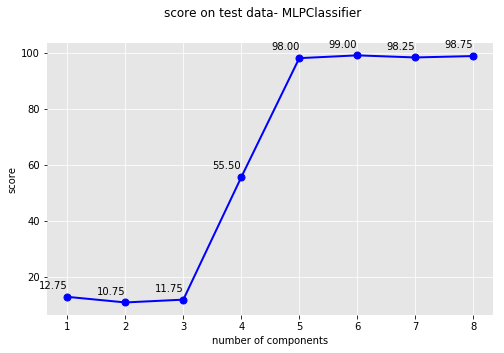

In [29]:
plot_accuracy(best_mlp_est, mlp_score)

## Anomaly Detection 

This part presents the anomaly detection algorithm based on multivariate Gaussian distribution and F1-score. The block diagram of the system using the anomaly detector is as follows: 
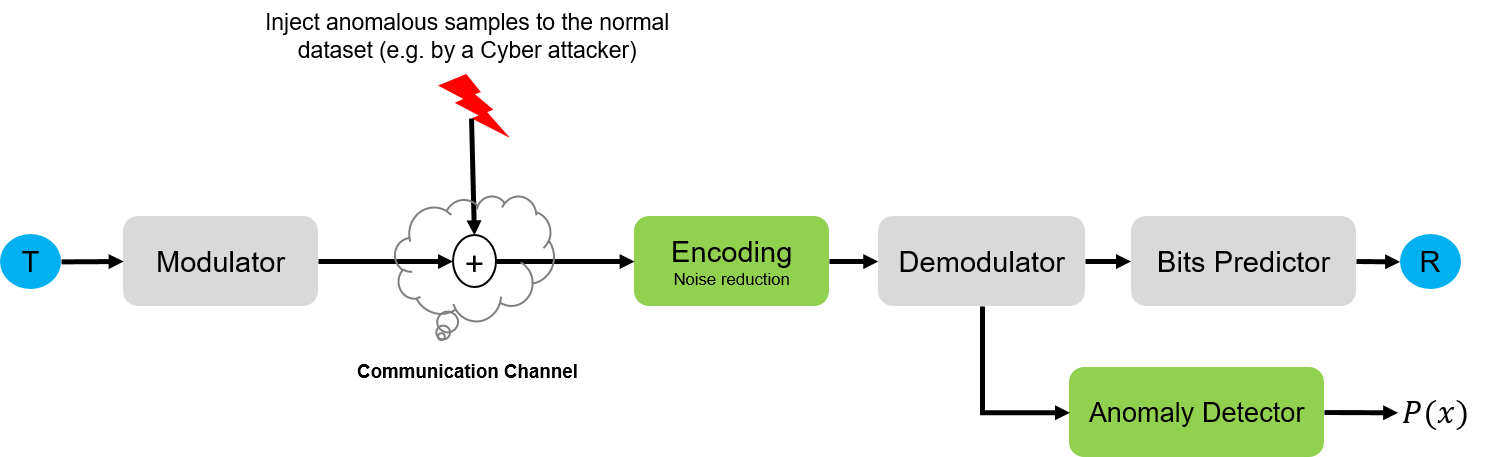



first, we define 5 points as anomalous samples which are injected to the normal samples by a cyber attacker.

In [30]:
X_anomaly = np.array([[10.2,  19.1,  -.2, -.04, 13.9,  14.26, -11.4, 27.3],
                      
                      [16.70,  -9.16,  .28, -.043, 12.91,  24.2, -13.44, 9.39],
                      
                     [-16.70,  -9.16,  .38, .043, 23.91,  -4.26, 12.44, 25.39],
                     
                     [20.7,  18.16,  -.18, -1.43e-02, 4.9,  24.26, -8.4, 16.39],
                     
                     [26.4,  -19.16,  .16, -.08, 13.91,  24.26, 18.44, 29.39]])

#### Plot normal samples vs anomalous samples
In this part normal samples with respect to the different features are plotted along with anamalous samples to compare their distribution.

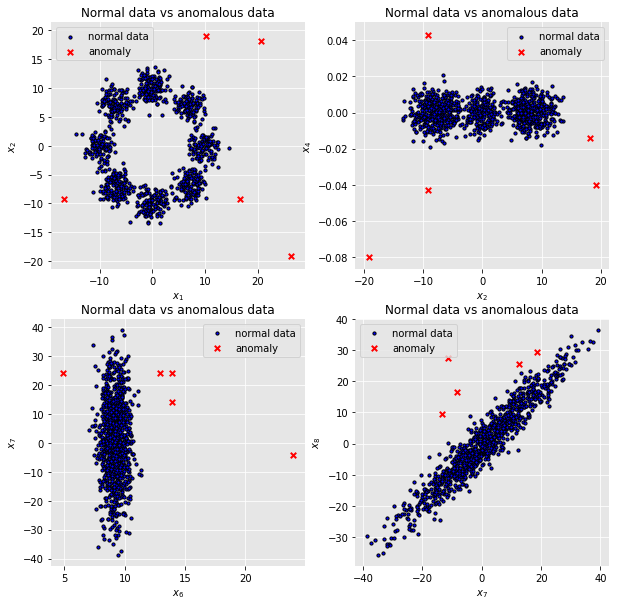

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],s=10, marker='o', c='b', alpha=1,edgecolors='k',cmap='coolwarm')
plt.scatter(X_anomaly[:,0],X_anomaly[:,1],s=30, alpha=1,edgecolors='k', marker='x', c='r',cmap='coolwarm')
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Normal data vs anomalous data')

plt.subplot(2,2,2)
plt.scatter(X[:,1],X[:,3],s=10, marker='o', c='b', alpha=1,edgecolors='k',cmap='coolwarm')
plt.scatter(X_anomaly[:,1],X_anomaly[:,3],s=30, alpha=1,edgecolors='k', marker='x', c='r',cmap='coolwarm')
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_2$')
plt.ylabel('$x_4$')
plt.title('Normal data vs anomalous data')

plt.subplot(2,2,3)
plt.scatter(X[:,5],X[:,6],s=10, marker='o', c='b', alpha=1,edgecolors='k',cmap='coolwarm')
plt.scatter(X_anomaly[:,4],X_anomaly[:,5],s=30, alpha=1,edgecolors='k', marker='x', c='r',cmap='coolwarm')
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_6$')
plt.ylabel('$x_7$')
plt.title('Normal data vs anomalous data')

plt.subplot(2,2,4)
plt.scatter(X[:,6],X[:,7],s=10, marker='o', c='b', alpha=1,edgecolors='k',cmap='coolwarm')
plt.scatter(X_anomaly[:,6],X_anomaly[:,7],s=30, alpha=1,edgecolors='k', marker='x', c='r',cmap='coolwarm')
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_7$')
plt.ylabel('$x_8$')
plt.title('Normal data vs anomalous data')

plt.show()

Define a new dataset (combination of normal samples and anomalous samples):

In [32]:
X_new = np.vstack((X, X_anomaly))

Define normal and anomalous labels for the dataset

In [33]:
y_new = y
y_new[:,] = 0                                                  #Laberl zero is considered for normal samples                                       

anomaly_labels = np.array([[1],[1],[1],[1],[1]]).reshape(5,)   #Label one is considered for anamalous samples
y_anomaly = np.hstack((y_new,anomaly_labels)) 

#### Fit a multivariate Gaussian distribution to the normal samples

if $p(x) < \epsilon$, then $x$ can be detected as an anomalous data.
if $p(x) \ge \epsilon$, then $x$ can be regarded as a normal data.

In [34]:
from scipy.stats import multivariate_normal

mu = np.mean(X, axis=0)
Sigma = np.cov(X.T)

p = multivariate_normal(mean=mu, cov=Sigma).pdf(X_new)

For now we try different values for $\epsilon$ interactively, but later, we will choose a proper value for this hyper-parameter using vaidation data and F1-score.

### Choosing epsilon 
Here we choose an $\epsilon$ by try and error

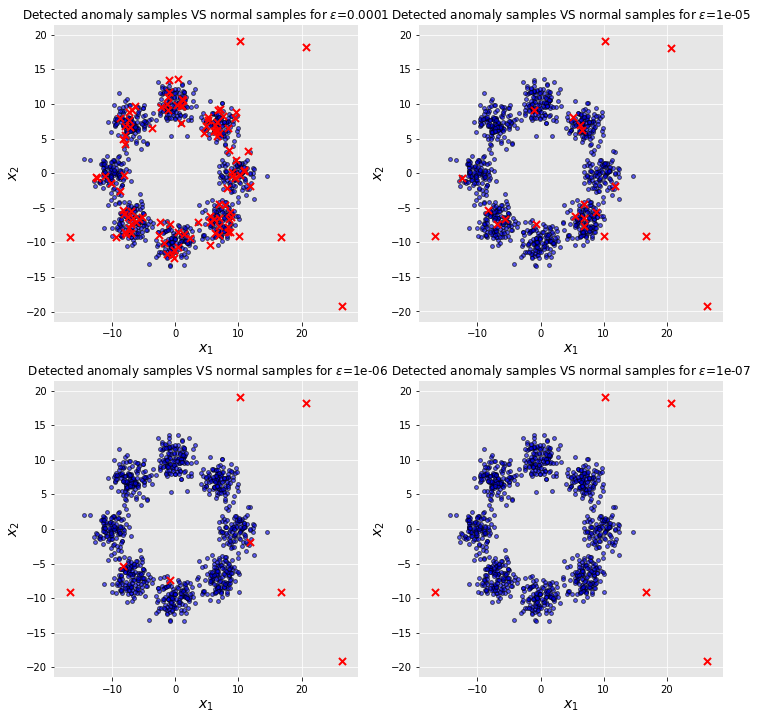

In [35]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
EPSILON = 1e-4
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('Detected anomaly samples VS normal samples for $\epsilon$='+ str(EPSILON))
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)

plt.subplot(2,2,2)
EPSILON = 1e-5
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('Detected anomaly samples VS normal samples for $\epsilon$='+ str(EPSILON) )
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)

plt.subplot(2,2,3)
EPSILON = 1e-6
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title(' Detected anomaly samples VS normal samples for $\epsilon$='+ str(EPSILON))
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)

plt.subplot(2,2,4)
EPSILON = 1e-7
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('Detected anomaly samples VS normal samples for $\epsilon$='+ str(EPSILON))
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)
plt.show()

#### Define a function to choose the best $\epsilon$ based on f1-score

In [36]:
def select_epsilon(y_val, p_val):
    best_epsilon = 0
    best_f1 = 0
    min_p, max_p = p_val.min(), p_val.max()
    step_size = (max_p - min_p) / 4000.0

    for epsilon in np.arange(min_p, max_p + step_size, step_size):
        
        # PREDICT OUTLIERS
        y_pred = (p_val < epsilon)
        
        # calculate TP, FP and FN
        tp = np.sum((y_pred == 1) & (y_val == 1)) * 1.0
        fp = np.sum((y_pred == 1) & (y_val == 0)) * 1.0
        fn = np.sum((y_pred == 0) & (y_val == 1)) * 1.0
                
        # calculate Precision, Recall and F1-score
        precision = tp / (tp + fp)
        recall    = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1, best_epsilon = f1, epsilon

    return best_f1, best_epsilon

Choose a value for $\epsilon$ which has maximum f1-score on validation data.

In [37]:
# STEP 1: estimate parameters mu and sigma from X_val
mu_val = np.mean(X_new, axis=0)
Sigma_val = np.cov(X_new.T)

# STEP 2: calculate probabilities
p_val = multivariate_normal(mean=mu_val, cov=Sigma_val).pdf(X_new)

# STEP 3: choose best value for epsilon
f1, eps = select_epsilon(y_anomaly, p_val)
print("f1 = {:.2g}, epsilon = {}".format(f1, eps))

f1 = 0.91, epsilon = 3.2545792650242765e-07


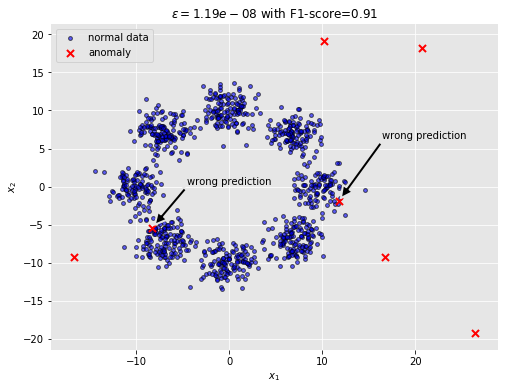

In [38]:
plt.figure(figsize=(8,6))

EPSILON = 3.2545792650242765e-07
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=1.19e-08$ with F1-score='+ str("%.2f" % f1))
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (21, 6),xy = (12, -1.5),arrowprops = {'facecolor' : 'black','lw': 2})

plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (0, 0),xy = (-8, -5),arrowprops = {'facecolor' : 'black','lw': 2})

plt.show()

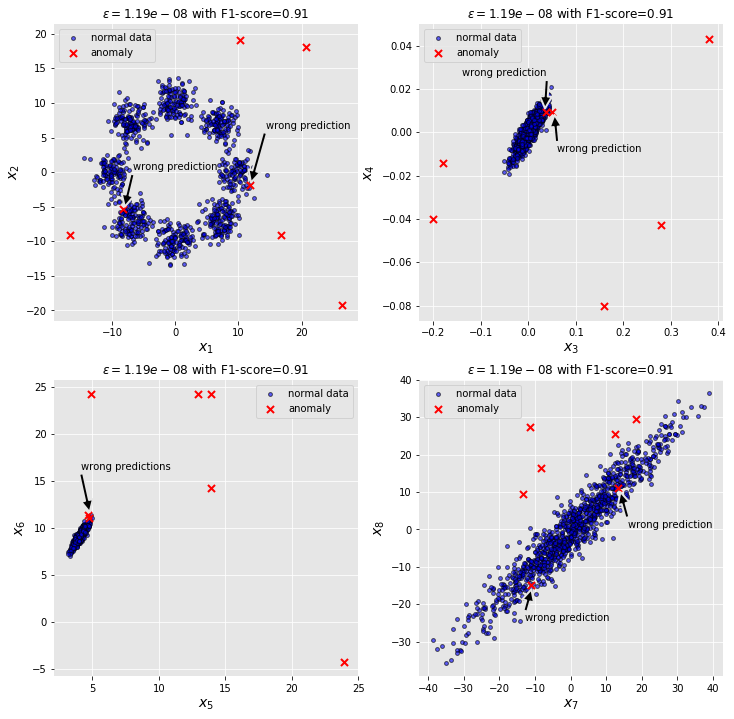

In [39]:
EPSILON = 3.2545792650242765e-07
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.scatter(X_new[p >= EPSILON, 0], X_new[p >= EPSILON, 1], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 0], X_new[p <  EPSILON, 1], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=1.19e-08$ with F1-score='+ str("%.2f" % f1))
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (21, 6),xy = (12, -1.5),arrowprops = {'facecolor' : 'black','lw': 2})
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (0, 0),xy = (-8, -5),arrowprops = {'facecolor' : 'black','lw': 2})
###################################
plt.subplot(2,2,2)
plt.scatter(X_new[p >= EPSILON, 2], X_new[p >= EPSILON, 3], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 2], X_new[p <  EPSILON, 3], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=1.19e-08$ with F1-score='+ str("%.2f" % f1))
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_3$', fontsize = 14)
plt.ylabel('$x_4$', fontsize = 14)
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (-0.05, 0.025),xy = (0.035, 0.011),arrowprops = {'facecolor' : 'black','lw': 2})
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (0.15, -0.01),xy = (0.055, 0.008),arrowprops = {'facecolor' : 'black','lw': 2})



plt.subplot(2,2,3)
plt.scatter(X_new[p >= EPSILON, 4], X_new[p >= EPSILON, 5], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 4], X_new[p <  EPSILON, 5], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=1.19e-08$ with F1-score='+ str("%.2f" % f1))
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_5$', fontsize = 14)
plt.ylabel('$x_6$', fontsize = 14)
plt.annotate('wrong predictions',
ha = 'center', va = 'bottom',
xytext = (7.5, 16),xy = (4.8, 11.7),arrowprops = {'facecolor' : 'black','lw': 2})


plt.subplot(2,2,4)
plt.scatter(X_new[p >= EPSILON, 6], X_new[p >= EPSILON, 7], s=15,  marker='o', c='b', edgecolors='k', alpha=0.6)
plt.scatter(X_new[p <  EPSILON, 6], X_new[p <  EPSILON, 7], s=50, marker='x', c='r', edgecolors='k')
plt.title('$\epsilon=1.19e-08$ with F1-score='+ str("%.2f" % f1))
plt.legend(['normal data','anomaly'])
plt.xlabel('$x_7$', fontsize = 14)
plt.ylabel('$x_8$', fontsize = 14)
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (-1, -25),xy = (-11, -16),arrowprops = {'facecolor' : 'black','lw': 2})
plt.annotate('wrong prediction',
ha = 'center', va = 'bottom',
xytext = (28, 0),xy = (14, 10),arrowprops = {'facecolor' : 'black','lw': 2})
plt.show()